In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation,Layer,Lambda
import io
from numpy.random import seed
seed(1)

# Reading data
uploaded = files.upload()
startup = pd.read_csv(io.StringIO(uploaded['50_Startups.csv'].decode('utf-8')))
startup.head(5)

Saving 50_Startups.csv to 50_Startups (8).csv


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
startup["State"]=preprocessing.LabelEncoder().fit_transform(startup["State"])
print(startup.isnull().sum()) #No NA Values present in the Dataset
startup.head(5)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [0]:
def model_building(hidden_layer):
    
    model = Sequential()
    
    for i in range(1,len(hidden_layer)-1):
        if (i==1):
            model.add(Dense(hidden_layer[i],input_dim=hidden_layer[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_layer[i],activation="relu"))
    model.add(Dense(hidden_layer[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return model

columns = startup.columns
features = columns[0:4]
target = columns[4]

startup_standardized = pd.DataFrame(data=StandardScaler().fit_transform(startup),columns=startup.columns)
startup_standardized.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [0]:
neuralnetwork_model = model_building([4,30,20,10,5,1])
neuralnetwork_model.fit(np.array(startup_standardized[features]),np.array(startup_standardized[target]),epochs=400)
predictions = neuralnetwork_model.predict(np.array(startup_standardized[features]))
predictions = pd.Series([i[0] for i in predictions])
rmse_value = np.sqrt(np.mean((predictions-startup_standardized[target])**2))

Epoch 1/400
50/50 [==============================] - 0s 3ms/step - loss: 0.9826 - accuracy: 0.0000e+00
Epoch 2/400
50/50 [==============================] - 0s 225us/step - loss: 0.9627 - accuracy: 0.0000e+00
Epoch 3/400
50/50 [==============================] - 0s 204us/step - loss: 0.9417 - accuracy: 0.0000e+00
Epoch 4/400
50/50 [==============================] - 0s 138us/step - loss: 0.9236 - accuracy: 0.0000e+00
Epoch 5/400
50/50 [==============================] - 0s 133us/step - loss: 0.9035 - accuracy: 0.0000e+00
Epoch 6/400
50/50 [==============================] - 0s 110us/step - loss: 0.8846 - accuracy: 0.0000e+00
Epoch 7/400
50/50 [==============================] - 0s 97us/step - loss: 0.8669 - accuracy: 0.0000e+00
Epoch 8/400
50/50 [==============================] - 0s 148us/step - loss: 0.8488 - accuracy: 0.0000e+00
Epoch 9/400
50/50 [==============================] - 0s 115us/step - loss: 0.8256 - accuracy: 0.0000e+00
Epoch 10/400
50/50 [==============================] - 0s 1

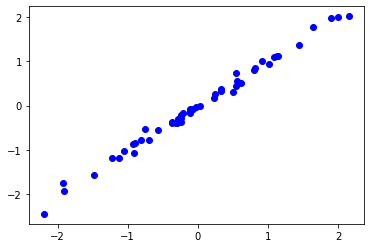

RMSE Value of Neural-Network Model:  0.0896077445830461
Correlation Co-efficient Value between Predictions and Actual Values: 
  [[1.         0.99602846]
 [0.99602846 1.        ]]


In [0]:
plt.plot(predictions,startup_standardized[target],"bo") #Plot shows a Linear line approximately at 45degrees concluding that the Predictions and Actual Values are very near to eachother
plt.show()
print("RMSE Value of Neural-Network Model: ",rmse_value) #Low-RMSE Value
print("Correlation Co-efficient Value between Predictions and Actual Values: \n ",np.corrcoef(predictions,startup_standardized[target])) #High Correlation Co-efficient shows that the predictions and
# Actual Values are almost Similar to each other which shows the model performs good